In [ ]:
from sklearn import datasets
import pandas as pds
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
  

In [3]:
type(iris.data)
type(iris.target)

numpy.ndarray

In [4]:
X = iris.data
y = iris.target

In [6]:
type(iris.feature_names)

list

In [ ]:
dfIris = pds.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ["target"])

dfIris["target"] = dfIris["target"].astype("category")
dfIris["target"] = dfIris["target"].cat.rename_categories(iris.target_names)

In [15]:
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


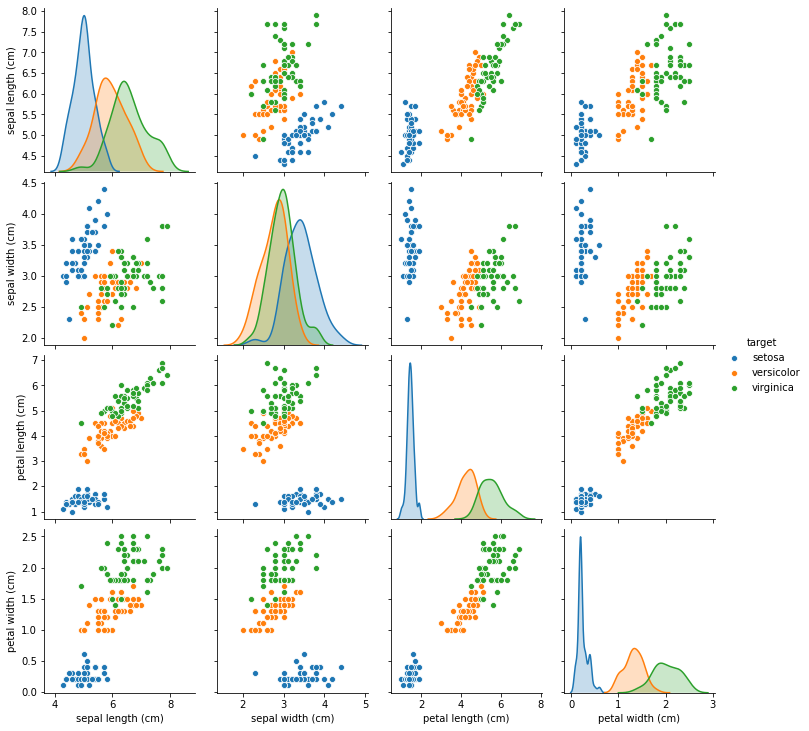

In [ ]:
sns.pairplot(data=dfIris, hue="target")

In [ ]:
X = dfIris.drop("target", axis=1)
y = dfIris["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
cv = KFold(5, shuffle=True, random_state=0)

score_split = cross_val_score(
    KNeighborsClassifier(n_neighbors=8), Xtrain, ytrain, cv=cv
)
score_split

array([0.95833333, 0.95833333, 0.95833333, 1.        , 1.        ])

In [24]:
score_split.mean()

0.975

In [25]:
import matplotlib.pyplot as plt

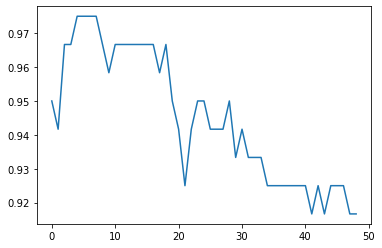

In [ ]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(
        KNeighborsClassifier(n_neighbors=k), Xtrain, ytrain, cv=cv
    ).mean()
    val_score.append(score)

plt.plot(val_score)

In [30]:
from sklearn.model_selection import validation_curve

In [ ]:
model = KNeighborsClassifier()

k = np.arange(1, 50)

train_score, val_score = validation_curve(model, Xtrain, ytrain, "n_neighbors", k, cv=5)

C:\Users\BStorm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [33]:
val_score.shape

(49, 5)

In [34]:
val_score

array([[0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.875     ],
       [0.95833333, 0.91666667, 0.91666667, 0.95833333, 0.875     ],
       [0.95833333, 0.95833333, 1.        , 0.95833333, 0.91666667],
       [0.95833333, 0.95833333, 0.875     , 0.95833333, 0.91666667],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.875     ],
       [0.95833333, 0.95833333, 0.91666667, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.91666667, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.91666667, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.91666667, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.91666667, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.

In [36]:
print(val_score.mean(axis=0))

[0.98044218 0.95238095 0.93112245 0.96003401 0.91156463]


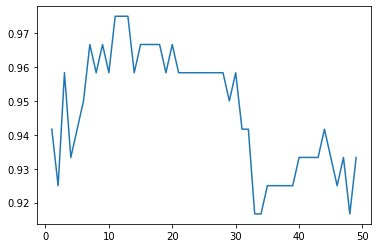

In [37]:
plt.plot(k, val_score.mean(axis=1))

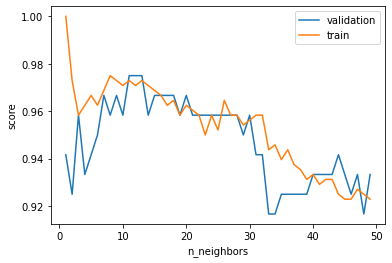

In [ ]:
plt.plot(k, val_score.mean(axis=1), label="validation")
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel("score")
plt.xlabel("n_neighbors")

plt.legend()

In [44]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "n_neighbors": np.arange(1, 20),
    "metric": ["euclidean", "manhattan", "minkowski"],
}


In [46]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [47]:
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [56]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [48]:
model = grid.best_estimator_

model.score(Xtest, ytest)

0.9666666666666667

Estimer le gain de performance du modèle en fonction de la quantité de données d'entrainement supplémentaire

In [ ]:
from sklearn.model_selection import learning_curve

N, train_score_training, val_score_training = learning_curve(
    model, Xtrain, ytrain, train_sizes=np.linspace(0.2, 1, 5), cv=5
)
print(N)
print(train_score_training)
print(val_score_training)

[19 38 57 76 96]
[[0.89473684 0.73684211 0.73684211 0.73684211 0.73684211]
 [0.94736842 0.89473684 1.         0.94736842 0.94736842]
 [0.96491228 0.98245614 0.96491228 0.98245614 0.98245614]
 [0.94736842 0.96052632 0.96052632 0.96052632 0.97368421]
 [0.95833333 0.97916667 0.96875    0.97916667 0.97916667]]
[[0.66666667 0.66666667 0.75       0.79166667 0.75      ]
 [0.83333333 0.91666667 0.91666667 0.91666667 0.83333333]
 [0.95833333 0.95833333 0.91666667 0.95833333 0.875     ]
 [1.         0.95833333 0.95833333 0.95833333 0.91666667]
 [1.         0.95833333 1.         0.95833333 0.95833333]]


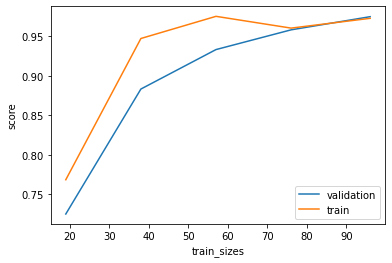

In [ ]:
plt.plot(N, val_score_training.mean(axis=1), label="validation")
plt.plot(N, train_score_training.mean(axis=1), label="train")

plt.ylabel("score")
plt.xlabel("train_sizes")
plt.legend()

Non supervisé (Kmeans)

In [58]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=3)

In [60]:
model.fit(X)

KMeans(n_clusters=3)

In [61]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [62]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

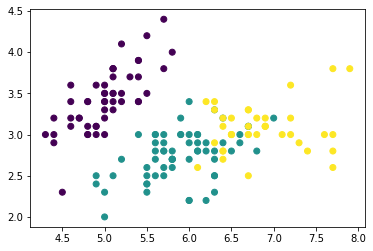

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.predict(X))

In [64]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

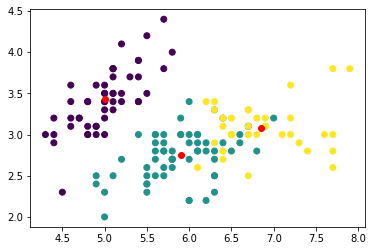

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c="r")

In [66]:
model.inertia_

78.851441426146

In [67]:
model.score(X)

-78.85144142614602

In [4]:
# %pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

fig = px.scatter_3d(X, X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], color=y, opacity=0.5)

fig.show()